In [3]:
import pandas as pd
import matplotlib.patches as mpatches

In [4]:
df = pd.read_csv("frailty_data.csv")
df.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [5]:
df["Height_m"] = df["Height"] * 0.0254
df["Weight_kg"] = df["Weight"] * 0.45359237
df.head()

,Height,Weight,Age,Grip strength,Frailty,Height_m,Weight_kg
0,65.8,112,30,30,N,1.67132,50.802345
1,71.5,136,19,31,N,1.81610,61.688562
2,69.4,153,45,29,N,1.76276,69.399633
3,68.2,142,22,28,Y,1.73228,64.410117
4,67.8,144,29,24,Y,1.72212,65.317301


In [6]:
df["BMI"] = (df["Weight_kg"] / (df["Height_m"] ** 2)).round(2)
df.head()

,Height,Weight,Age,Grip strength,Frailty,Height_m,Weight_kg,BMI
0,65.8,112,30,30,N,1.67132,50.802345,18.19
1,71.5,136,19,31,N,1.81610,61.688562,18.70
2,69.4,153,45,29,N,1.76276,69.399633,22.33
3,68.2,142,22,28,Y,1.73228,64.410117,21.46
4,67.8,144,29,24,Y,1.72212,65.317301,22.02


In [7]:
def categorize_age(age):
    if age < 30:
        return "<30"
    elif 30 <= age <= 45:
        return "30-45"
    elif 46 <= age <= 60:
        return "46-60"
    else:
        return ">60"

df["AgeGroup"] = df["Age"].apply(categorize_age)
df.head()

,Height,Weight,Age,Grip strength,Frailty,Height_m,Weight_kg,BMI,AgeGroup
0,65.8,112,30,30,N,1.67132,50.802345,18.19,30-45
1,71.5,136,19,31,N,1.81610,61.688562,18.70,<30
2,69.4,153,45,29,N,1.76276,69.399633,22.33,30-45
3,68.2,142,22,28,Y,1.73228,64.410117,21.46,<30
4,67.8,144,29,24,Y,1.72212,65.317301,22.02,<30


In [8]:
df["Frailty_binary"] = df["Frailty"].map({"Y": 1, "N": 0}).astype("int8")
df.head()

,Height,Weight,Age,Grip strength,Frailty,Height_m,Weight_kg,BMI,AgeGroup,Frailty_binary
0,65.8,112,30,30,N,1.67132,50.802345,18.19,30-45,0
1,71.5,136,19,31,N,1.81610,61.688562,18.70,<30,0
2,69.4,153,45,29,N,1.76276,69.399633,22.33,30-45,0
3,68.2,142,22,28,Y,1.73228,64.410117,21.46,<30,1
4,67.8,144,29,24,Y,1.72212,65.317301,22.02,<30,1


In [9]:
age_dummies = pd.get_dummies(df["AgeGroup"], prefix="AgeGroup")
df = pd.concat([df, age_dummies], axis=1)
df.head()

,Height,Weight,Age,Grip strength,Frailty,Height_m,Weight_kg,BMI,AgeGroup,Frailty_binary,AgeGroup_30-45,AgeGroup_46-60,AgeGroup_<30
0,65.8,112,30,30,N,1.67132,50.802345,18.19,30-45,0,True,False,False
1,71.5,136,19,31,N,1.81610,61.688562,18.70,<30,0,False,False,True
2,69.4,153,45,29,N,1.76276,69.399633,22.33,30-45,0,True,False,False
3,68.2,142,22,28,Y,1.73228,64.410117,21.46,<30,1,False,False,True
4,67.8,144,29,24,Y,1.72212,65.317301,22.02,<30,1,False,False,True


In [10]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns

summary_table = df[numeric_cols].agg(["mean", "median", "std"]).T

print(summary_table)

                      mean      median        std
Height           68.600000   68.450000   1.670662
Weight          131.900000  136.000000  14.231811
Age              32.500000   29.500000  12.860361
Grip strength    26.000000   27.000000   4.521553
Height_m          1.742440    1.738630   0.042435
Weight_kg        59.828834   61.688562   6.455441
BMI              19.682000   19.185000   1.780972
Frailty_binary    0.400000    0.000000   0.516398


In [11]:
correlation = df["Grip strength"].corr(df["Frailty_binary"])

print("Correlation between Grip_strength and Frailty_binary:", correlation)

Correlation between Grip_strength and Frailty_binary: -0.4758668672668007


In [12]:
report_content = f"""
# Frailty Data Analysis Report

## Summary Statistics

{summary_table.to_markdown()}

## Correlation Analysis

Correlation between Grip_strength and Frailty_binary:

**{correlation:.4f}**
"""

with open("findings.md", "w") as f:
    f.write(report_content)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


In [14]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
df.columns = df.columns.str.replace(" ", "_")
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [17]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [18]:
# Create overall average column
df["overall_avg"] = df[["math_score", "reading_score", "writing_score"]].mean(axis=1)

In [19]:
print("Final Dataset Shape:", df.shape)
df.head()

Final Dataset Shape: (1000, 9)


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


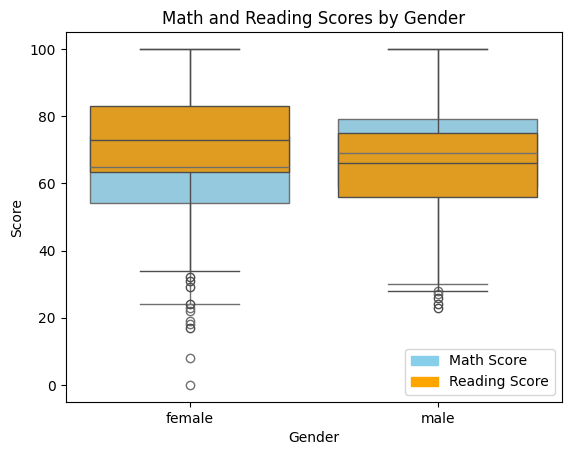

In [20]:
plt.figure()
sns.boxplot(x="gender", y="math_score", data=df, color='skyblue')
sns.boxplot(x="gender", y="reading_score", data=df, color = 'orange')
plt.title("Math and Reading Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Score")
math_patch = mpatches.Patch(color='skyblue', label='Math Score')
reading_patch = mpatches.Patch(color='orange', label='Reading Score')
plt.legend(handles=[math_patch, reading_patch])
plt.savefig("V1_Gender_Boxplots.png")
plt.show()

The boxplots show clear differences between male and female students across math and reading.
Male students tend to have slightly higher median math scores.
Female students show higher median reading scores compared to males.
The spread of reading scores is slightly tighter than math scores.
There are some outliers in both subjects for both genders.
Overall, gender differences are more visible in reading performance than math.

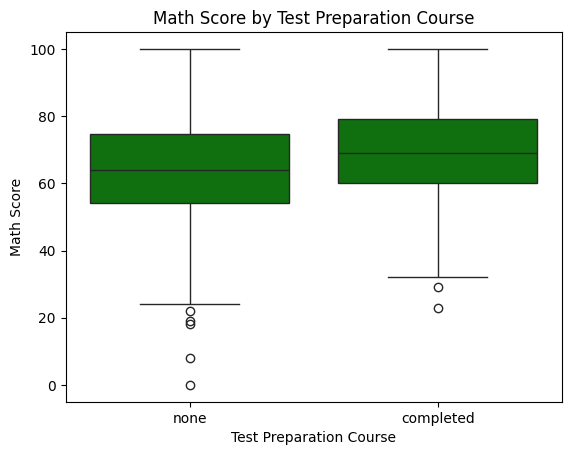

In [21]:
plt.figure()
sns.boxplot(x="test_preparation_course", y="math_score", data=df,color="green")
plt.title("Math Score by Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Math Score")
plt.savefig("V2_TestPrep_Math.png")
plt.show()

Students who completed the test preparation course have a higher median math score.
The distribution for completed students is shifted upward.
Students with no preparation show a wider spread in scores.
The difference in medians suggests test preparation has a positive effect.
There are still some high performers without preparation.
Overall, preparation appears to significantly improve math performance.

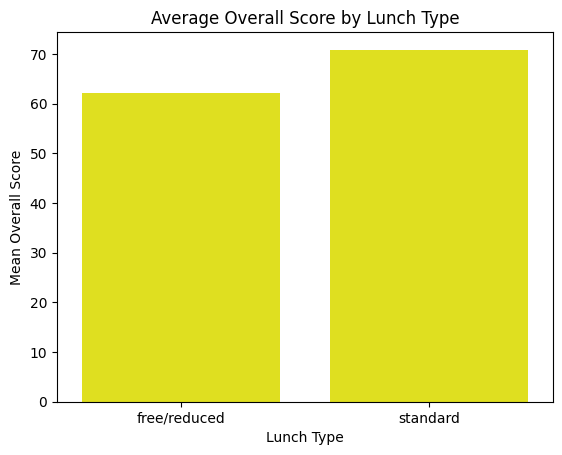

In [22]:
lunch_means = df.groupby("lunch")["overall_avg"].mean().reset_index()

plt.figure()
sns.barplot(x="lunch", y="overall_avg", data=lunch_means, color = "yellow")
plt.title("Average Overall Score by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Mean Overall Score")
plt.savefig("V3_Lunch_Performance.png")
plt.show()

Students with standard lunch have higher average scores.
Free/reduced lunch students show lower overall performance.
This suggests socioeconomic factors may influence outcomes.
The difference in mean scores is noticeable.
Lunch type appears strongly associated with academic achievement.
Standard lunch students consistently outperform the other group.

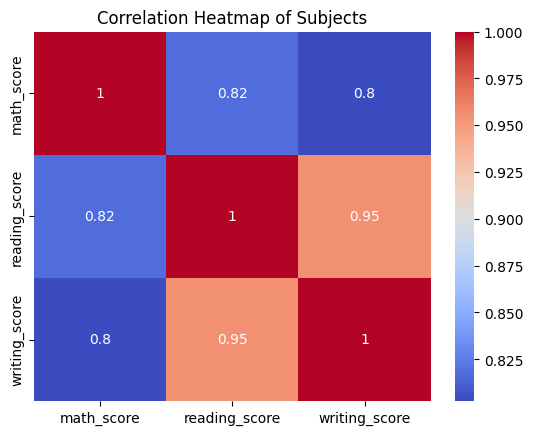

In [23]:
plt.figure()
corr = df[["math_score", "reading_score", "writing_score"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Subjects")
plt.savefig("V4_Correlation_Heatmap.png")
plt.show()

Strong positive correlations exist between all subjects, particularly reading and writing. Because math also tracks closely with these literacy areas, student performance tends to be uniform across the board. These high coefficients highlight a clear link between abilities in different academic fields.

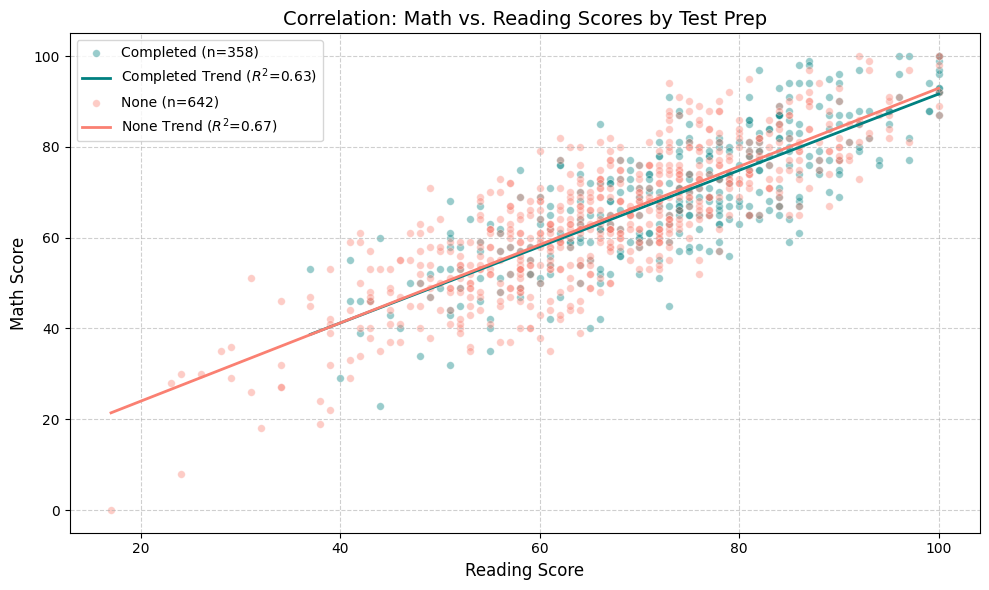

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

groups = {
    "Completed": (df[df["test_preparation_course"] == "completed"], "teal"),
    "None": (df[df["test_preparation_course"] == "none"], "salmon")
}

plt.figure(figsize=(10, 6))

for label, (data, color) in groups.items():
    # 1. Scatter Plot
    plt.scatter(data["reading_score"], data["math_score"],
                label=f"{label} (n={len(data)})",
                alpha=0.4, s=30, color=color, edgecolors='w', linewidth=0.5)

    # 2. Regression Calculation
    slope, intercept, r_val, p_val, std_err = linregress(data["reading_score"], data["math_score"])

    # 3. Plot Regression Line
    x_range = np.array([data["reading_score"].min(), data["reading_score"].max()])
    y_range = intercept + slope * x_range

    # Add R-squared to the label or plot
    plt.plot(x_range, y_range, color=color, linewidth=2,
             label=f"{label} Trend ($R^2$={r_val**2:.2f})")

plt.title("Correlation: Math vs. Reading Scores by Test Prep", fontsize=14)
plt.xlabel("Reading Score", fontsize=12)
plt.ylabel("Math Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True)
plt.tight_layout()

plt.savefig("V5_Scatter_Trend_Enhanced.png", dpi=300)
plt.show()


There is a strong positive relationship between reading and math scores. Students with higher reading scores tend to have higher math scores. Both groups show a positive slope in the regression lines. Students who completed preparation tend to cluster at higher score ranges. The slopes appear similar but completed students are shifted upward. Test preparation improves overall performance but does not dramatically change the relationship slope.